# Week 2 Assignment
## Overview
The following is a simple exploratory data analysis of the GapMinder data set as part of the Coursera Data Management and Visualization course.  In this analysis I would like to examine the relationship between the economic well-being of a society and the level of democratization.

## About the Data
The data for this analysis comes from a subset of the GapMider project data.  In this section I will examine the variables I am interested in more detail.

### Income per Person
In order to measure the economic well-being I will be using GDP per capita data.  This originally came from the World Bank.  It is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.  The data are in constant 2000 US Dollars.  The GapMinder data set that I will be analyzing is the 2010 GDP per capita.

### Democracy Score
The democracy score comes from the Polity IV project.  It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.  The GapMinder data set that I will analyzing is the polity score for 2009.  To get a feel for this data take a look at the following figure provided by the Polity IV project authors:

![polity categories](http://www.systemicpeace.org/polity/demmap13.jpg)

### 2010 Internet Users
Although not part of my initial study I would also be interested in looking at the relationship between the level of democratization and the people with internet access.

## Preprocessing the Data
I begin by importing the libraries needed for the analysis:

In [1]:
# Import libraries needed
import pandas as pd
import numpy as np
from ggplot import *

Now I have python parse the csv file and print out some basic statistics about the data frame (df):

In [2]:
# Read in the Data
df = pd.read_csv('gapminder.csv', low_memory=False)

# Print some basic statistics
n = str(len(df))
cols = str(len(df.columns))
print('Number of observations: '+ n +' (rows)')
print('Number of variables: '+ cols +' (columns)')

Number of observations: 213 (rows)
Number of variables: 16 (columns)


There are 213 observations with 16 variables in the data frame.  I need to clean up the raw data prior to the analysis.  I will first change the varaible types for the variables of interst:

In [3]:
# Change the data type for variables of interest
df['polityscore'] = df['polityscore'].convert_objects(convert_numeric=True)
df['incomeperperson'] = df['incomeperperson'].convert_objects(convert_numeric=True)
df['internetuserate'] = df['internetuserate'].convert_objects(convert_numeric=True)

## Exploratory Data Analysis
### 2009 Democracy Score
The first variable of interest it the polityscore variable.  This variable is a measure of the level of openess of the country.

In [4]:
print ('Countries with a Democracy Score: ' + str(df['polityscore'].count()) + ' out of ' + str(len(df)))

Countries with a Democracy Score: 161 out of 213


In [5]:
print('Countries by Democracy Score (-10=autocracy & 10=full democracy)')
polity_counts = df.groupby('polityscore').size()
print(polity_counts)

Countries by Democracy Score (-10=autocracy & 10=full democracy)
polityscore
-10     2
-9      4
-8      2
-7     12
-6      3
-5      2
-4      6
-3      6
-2      5
-1      4
 0      6
 1      3
 2      3
 3      2
 4      4
 5      7
 6     10
 7     13
 8     19
 9     15
 10    33
dtype: int64


In [6]:
print('Percent of Countries by Democracy Score (Out of All Countries)')
polity_percents = polity_counts * 100 / len(df)
print(polity_percents)

Percent of Countries by Democracy Score (Out of All Countries)
polityscore
-10     0.938967
-9      1.877934
-8      0.938967
-7      5.633803
-6      1.408451
-5      0.938967
-4      2.816901
-3      2.816901
-2      2.347418
-1      1.877934
 0      2.816901
 1      1.408451
 2      1.408451
 3      0.938967
 4      1.877934
 5      3.286385
 6      4.694836
 7      6.103286
 8      8.920188
 9      7.042254
 10    15.492958
dtype: float64


In [7]:
print('Percent of Countries by Democracy Score (Out of Countries with Democracy Scores)')
has_polity = df[np.isfinite(df['polityscore'])]
polity_percents = polity_counts * 100 / len(has_polity)
print(polity_percents)

Percent of Countries by Democracy Score (Out of Countries with Democracy Scores)
polityscore
-10     1.242236
-9      2.484472
-8      1.242236
-7      7.453416
-6      1.863354
-5      1.242236
-4      3.726708
-3      3.726708
-2      3.105590
-1      2.484472
 0      3.726708
 1      1.863354
 2      1.863354
 3      1.242236
 4      2.484472
 5      4.347826
 6      6.211180
 7      8.074534
 8     11.801242
 9      9.316770
 10    20.496894
dtype: float64


There are 33 countries that are full democracies (have a polity score of 10).  This is roughly 15% of all the data.  There are 2 observations that are autocracies.  I want to see the distribution so I will create a quick plot using yhat's awesome ggplot library:

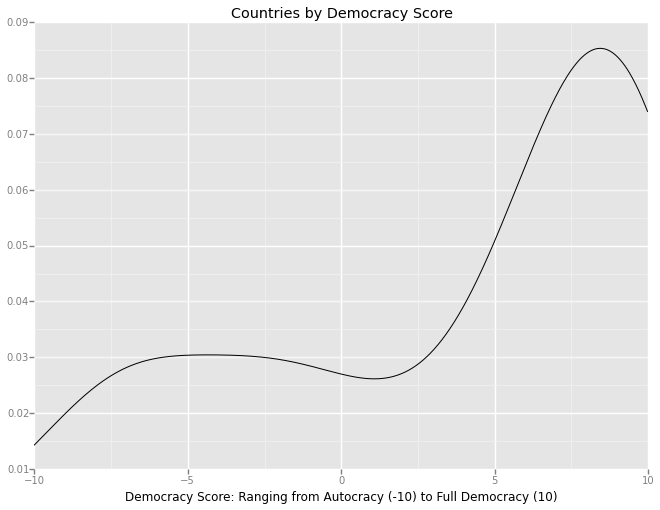

<ggplot: (34690511)>


In [8]:
%matplotlib inline
polity_plot = ggplot(df, aes(x='polityscore')) + geom_density() + ggtitle('Countries by Democracy Score') + xlab('Democracy Score: Ranging from Autocracy (-10) to Full Democracy (10)')
print(polity_plot)

We see that most of the countries are greater than zero.  I would like to see how many so I will compute a quick percentage:

In [9]:
greater_than_zero = df[df['polityscore'] > 0]
greater_than_zero_percent = len(greater_than_zero) * 100 / len(df)
print('Number of countries with a Polity score greater than zero: ' + str(len(greater_than_zero)))
print('Percent of countries with a Polity score greater than zero: ' + str(greater_than_zero_percent) + '%')

Number of countries with a Polity score greater than zero: 109
Percent of countries with a Polity score greater than zero: 51%


109 of the 213 countries in this data set have some degree of openness.  That makes up little over half of the data (51%).

### 2010 GDP Per Person
The second variable of interest is the measure of economic well-being.  The most common way to measure economic well-being is using per capita GDP, although it is not a perfect measure.  As previously noted it is the 2010 percapita GDP denoted in 2000 US dollars.  

In [10]:
print ('Countries with a GDP Per Capita: ' + str(df['incomeperperson'].count()) + ' out of ' + str(len(df)))

Countries with a GDP Per Capita: 190 out of 213


Since GDP per person is a continuous varible I will need to create a discrete one. For this assignment I will create quintiles:

In [11]:
df['incomequintiles'] = pd.cut(df['incomeperperson'], 5, labels=['Lowest','Second','Middle','Fourth','Highest'])

Now that the income quintiles are formed I can calculate frequencies:

In [12]:
print('Countries by Per Capita GDP Quintiles')
incomequintiles_counts = df.groupby('incomequintiles').size()
print(incomequintiles_counts)

Countries by Per Capita GDP Quintiles
incomequintiles
Lowest     162
Second      24
Middle       2
Fourth       1
Highest      1
dtype: int64


In [13]:
print('Percent of Countries by Per Capita Quintiles (Out of All Countries)')
incomequintiles_percents = incomequintiles_counts * 100 / len(df)
print(incomequintiles_percents)

Percent of Countries by Per Capita Quintiles (Out of All Countries)
incomequintiles
Lowest     76.056338
Second     11.267606
Middle      0.938967
Fourth      0.469484
Highest     0.469484
dtype: float64


In [14]:
print('Percent of Countries by Per Capita Quintiles (Out of Countries with GDP Per Person)')
has_income = df[np.isfinite(df['incomeperperson'])]
incomequintiles_percents = incomequintiles_counts * 100 / len(has_income)
print(incomequintiles_percents)

Percent of Countries by Per Capita Quintiles (Out of Countries with GDP Per Person)
incomequintiles
Lowest     85.263158
Second     12.631579
Middle      1.052632
Fourth      0.526316
Highest     0.526316
dtype: float64


We see that 162 (76%) of the observations are in the lowest quintile.  It seems that there are two outliers that make up the fourth and fifth quintiles.

### 2010 Internet Users
Since the assignment asked me to explore a third variable I decided to look into the internet users.  Once again I need to create some discrete categories so I created quintiles.

In [15]:
print ('Countries with Internet Users: ' + str(df['internetuserate'].count()) + ' out of ' + str(len(df)))

Countries with Internet Users: 192 out of 213


In [16]:
df['internetquintiles'] = pd.cut(df['internetuserate'], 5, labels=['Lowest','Second','Middle','Fourth','Highest'])

print('Countries by Internet User Quintiles')
internetquintiles_counts = df.groupby('internetquintiles').size()
print(internetquintiles_counts)

Countries by Internet User Quintiles
internetquintiles
Lowest     73
Second     35
Middle     37
Fourth     24
Highest    23
dtype: int64


In [17]:
print('Percent of Countries by Internet User Quintiles (Out of All Countries)')
internetquintiles_percents = internetquintiles_counts * 100 / len(df)
print(internetquintiles_percents)

Percent of Countries by Internet User Quintiles (Out of All Countries)
internetquintiles
Lowest     34.272300
Second     16.431925
Middle     17.370892
Fourth     11.267606
Highest    10.798122
dtype: float64


In [18]:
print('Internet User Quintiles Percentages (Out of Countries with Internet Users)')
has_internet = df[np.isfinite(df['internetuserate'])]
internetquintiles_percents = internetquintiles_counts * 100 / len(has_internet)
print(internetquintiles_percents)

Internet User Quintiles Percentages (Out of Countries with Internet Users)
internetquintiles
Lowest     38.020833
Second     18.229167
Middle     19.270833
Fourth     12.500000
Highest    11.979167
dtype: float64


We see that over a third (73 out of 213) of the countries fall in the lowest quintile.

## Next Steps
I want to simplify the democracy score since there are 21 values.  I would like to reduce them to the five categories created by the authors (online at: http://www.systemicpeace.org/polity/polity4.htm).  You can see the five categories in the map legend in the About the Data section of this jupyter notebook.

I also may have to rework the income breaks.  Quintiles do not provide enough diversity.  87% of all observations fall within the lowest two quintiles.  I may have to break on equal intervals or some other means.